In [9]:
import numpy as np
import pandas as pd
import mediapipe as mp
import os
import cv2
import tensorflow as tf
print('r')

r


In [2]:
print('e')

e


In [7]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# For static images:
IMAGE_FILES = []
with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=2,
    min_detection_confidence=0.5) as hands:
  for idx, file in enumerate(IMAGE_FILES):
    # Read an image, flip it around y-axis for correct handedness output (see
    # above).
    image = cv2.flip(cv2.imread(file), 1)
    # Convert the BGR image to RGB before processing.
    results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    # Print handedness and draw hand landmarks on the image.
    print('Handedness:', results.multi_handedness)
    if not results.multi_hand_landmarks:
      continue
    image_height, image_width, _ = image.shape
    annotated_image = image.copy()
    for hand_landmarks in results.multi_hand_landmarks:
      print('hand_landmarks:', hand_landmarks)
      print(
          f'Index finger tip coordinates: (',
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
          f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
      )
      mp_drawing.draw_landmarks(
          annotated_image,
          hand_landmarks,
          mp_hands.HAND_CONNECTIONS,
          mp_drawing_styles.get_default_hand_landmarks_style(),
          mp_drawing_styles.get_default_hand_connections_style())
    cv2.imwrite(
        '/tmp/annotated_image' + str(idx) + '.png', cv2.flip(annotated_image, 1))
    # Draw hand world landmarks.
    if not results.multi_hand_world_landmarks:
      continue
    for hand_world_landmarks in results.multi_hand_world_landmarks:
      mp_drawing.plot_landmarks(
        hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

# For webcam input:
cap = cv2.VideoCapture(0)
with mp_hands.Hands(
    model_complexity=0,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
  while cap.isOpened():
    success, image = cap.read()
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = hands.process(image)

    # Draw the hand annotations on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    if results.multi_hand_landmarks:
      for hand_landmarks in results.multi_hand_landmarks:
        mp_drawing.draw_landmarks(
            image,
            hand_landmarks,
            mp_hands.HAND_CONNECTIONS,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
    # Flip the image horizontally for a selfie-view display.
    cv2.imshow('MediaPipe Hands', cv2.flip(image, 1))
    if cv2.waitKey(5) & 0xFF == 27:
      break
cap.release()
cv2.destroyAllWindows()

In [3]:
import numpy as np
import pandas as pd
import mediapipe as mp
import os
import cv2

In [4]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

In [11]:
# A-Z kecuali J dan Z karena J dan Z memerlukan gesture (harus video)
alphabets = list("DEFGHIJKLMNOPQRSTUVWXYZ")
alphabets.extend(['nothing','space','nothing'])


In [12]:
len(alphabets)

26

In [21]:
import os

# Tentukan path direktori
dataset_directory_prefix = 'asl_alphabet_train/asl_alphabet_train'

# Hitung jumlah folder di dalam direktori tersebut
folders = [f for f in os.listdir(dataset_directory_prefix) if os.path.isdir(os.path.join(dataset_directory_prefix, f))]
len(folders)


29

In [26]:
print(alphabets)

['D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [29]:
import os
import cv2
import mediapipe as mp
import pandas as pd


for label in alphabets:
    dataset_directory_prefix = 'asl_alphabet_train/asl_alphabet_train'
    for dirname, _, filenames in os.walk(os.path.join(dataset_directory_prefix, label)):

        for filename in filenames:
            pathname = os.path.join(dirname, filename)

            with mp_hands.Hands(
                static_image_mode=True,
                max_num_hands=1,
                min_detection_confidence=0.3
            ) as hands:

                # Read the original image and process its landmarks
                image = cv2.imread(pathname)
                result = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

                # Initialize list for storing landmark coordinates
                landmark_vertices_xyz = []
                if result.multi_hand_landmarks:
                    for l in result.multi_hand_landmarks[0].landmark:
                        landmark_vertices_xyz.append(l.x)
                        landmark_vertices_xyz.append(l.y)
                        landmark_vertices_xyz.append(l.z)

                    # Add the landmarks of the original image to the dataset
                    temp_dataset.append((*landmark_vertices_xyz, label))

                # Apply horizontal flip to the image and process the flipped image's landmarks
                flipped_image = cv2.flip(image, 1)
                result = hands.process(cv2.cvtColor(flipped_image, cv2.COLOR_BGR2RGB))

                flipped_landmark_vertices_xyz = []
                if result.multi_hand_landmarks:
                    for l in result.multi_hand_landmarks[0].landmark:
                        flipped_landmark_vertices_xyz.append(l.x)
                        flipped_landmark_vertices_xyz.append(l.y)
                        flipped_landmark_vertices_xyz.append(l.z)

                    # Add the landmarks of the flipped image to the dataset
                    temp_dataset.append((*flipped_landmark_vertices_xyz, label))

    print(f'imported: {label}')

# Prepare the labels for the dataframe
landmark_vertices_xyz_label = []
for idx in range(21):  # 21 landmarks for a hand
    for char in list('xyz'):
        vertex_label = char + str(idx)
        landmark_vertices_xyz_label.append(vertex_label)

# Create the dataframe with the data
dataset = pd.DataFrame(temp_dataset, columns=[*landmark_vertices_xyz_label, 'target'])
print(dataset.head())


KeyboardInterrupt: 

In [13]:
temp_dataset = []
last = list('abcdefghijklmnopqrstuvwxyz')
# Initialize webcam
last.extend(['nothing','space','del'])
print('mulai')
for label in last:
    dataset_directory_prefix = 'asl_alphabet_train/asl_alphabet_train'
    for dirname, _, filenames in os.walk(os.path.join(dataset_directory_prefix, label)):

        for filename in filenames:
            pathname = os.path.join(dirname, filename)

            with mp_hands.Hands(
                static_image_mode=True,
                max_num_hands=1,
                min_detection_confidence=0.3
            ) as hands:

                image = cv2.flip(cv2.imread(pathname), 1)
                result = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

                landmark_vertices_xyz = []
                if not result.multi_hand_landmarks:
                    continue

                for l in result.multi_hand_landmarks[0].landmark:
                    landmark_vertices_xyz.append(l.x)
                    landmark_vertices_xyz.append(l.y)
                    landmark_vertices_xyz.append(l.z)

                temp_dataset.append((*landmark_vertices_xyz, label))
                
    print(f'imported: {label}')
        
landmark_vertices_xyz_label = []
for idx in range(21):
    for char in list('xyz'):
        vertex_label = char+str(idx)
        landmark_vertices_xyz_label.append(vertex_label)
            
print(*landmark_vertices_xyz_label)
        
dataset = pd.DataFrame(temp_dataset, columns=[*landmark_vertices_xyz_label, 'target'])
dataset.head()

mulai
imported: del
x0 y0 z0 x1 y1 z1 x2 y2 z2 x3 y3 z3 x4 y4 z4 x5 y5 z5 x6 y6 z6 x7 y7 z7 x8 y8 z8 x9 y9 z9 x10 y10 z10 x11 y11 z11 x12 y12 z12 x13 y13 z13 x14 y14 z14 x15 y15 z15 x16 y16 z16 x17 y17 z17 x18 y18 z18 x19 y19 z19 x20 y20 z20


,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x18,y18,z18,x19,y19,z19,x20,y20,z20,target
0,0.415758,0.422984,2.471713e-06,0.488876,0.430621,-0.171250,0.593579,0.447603,-0.236805,0.695718,...,0.781940,0.540270,0.147423,0.824332,0.584336,0.131674,0.861938,0.623602,0.115731,del
1,0.460307,0.620262,9.124311e-07,0.489645,0.589877,-0.107865,0.565542,0.561548,-0.148791,0.650431,...,0.718038,0.678564,-0.027922,0.731751,0.724391,-0.048581,0.743410,0.768095,-0.056577,del
2,0.451644,0.620009,7.568311e-07,0.483177,0.589414,-0.097725,0.567793,0.560330,-0.130305,0.655060,...,0.707311,0.660042,-0.018939,0.715714,0.707557,-0.041054,0.721105,0.751959,-0.047200,del
3,0.452529,0.631248,4.949998e-07,0.488811,0.599106,-0.093322,0.574037,0.570344,-0.121352,0.661220,...,0.713294,0.660084,-0.003741,0.720367,0.703264,-0.025721,0.725553,0.744449,-0.032360,del
4,0.441140,0.605489,4.450249e-07,0.479404,0.583311,-0.107147,0.571874,0.564872,-0.143015,0.665984,...,0.715872,0.647581,-0.016674,0.722406,0.696842,-0.037028,0.729378,0.742052,-0.041529,del


In [15]:
import pandas as pd

# Memuat file CSV


# Menyimpan file CSV yang sudah diperbarui ke file yang sama
dataset.to_csv('data.csv', index=False)

print("Data telah disaring dan file 'data_withflip.csv' telah diperbarui.")


Data telah disaring dan file 'data_withflip.csv' telah diperbarui.


In [237]:
dataset.to_csv('data_withflip.csv', index=False)

In [269]:
dataset

,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x18,y18,z18,x19,y19,z19,x20,y20,z20,target
30,0.455066,0.583699,-6.535667e-07,0.569869,0.507308,-0.034267,0.639892,0.374764,-0.041253,0.651905,...,0.391801,0.323449,-0.071389,0.404981,0.408848,-0.056393,0.403411,0.461151,-0.029737,A
31,0.530725,0.580555,-1.466574e-06,0.415370,0.502491,-0.018718,0.356044,0.370863,-0.029911,0.347148,...,0.607249,0.319979,-0.093122,0.587917,0.400668,-0.073617,0.592234,0.454956,-0.046861,A
32,0.484675,0.614162,-8.084496e-07,0.602145,0.543912,-0.025812,0.676195,0.407449,-0.030664,0.689200,...,0.433379,0.362128,-0.071392,0.446727,0.449884,-0.059598,0.444696,0.504641,-0.038163,A
33,0.503911,0.612925,-1.550067e-06,0.381692,0.537464,-0.020457,0.317811,0.408933,-0.031951,0.306352,...,0.557621,0.356249,-0.085901,0.545065,0.436264,-0.071621,0.553097,0.494535,-0.048798,A
34,0.723497,0.674151,-6.063991e-07,0.796600,0.617823,-0.031191,0.847890,0.513129,-0.036425,0.862495,...,0.623255,0.453557,-0.038356,0.630417,0.509658,-0.031472,0.640656,0.555732,-0.014557,A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13318,0.552795,0.626422,-2.897652e-07,0.476988,0.629296,-0.020550,0.398038,0.593572,-0.039124,0.326081,...,0.419970,0.370912,-0.067935,0.363862,0.349609,-0.077018,0.316619,0.342923,-0.082068,C
13319,0.428953,0.621917,7.098029e-07,0.519234,0.628358,-0.015537,0.600219,0.600483,-0.026661,0.667286,...,0.569510,0.379012,-0.042894,0.622815,0.347811,-0.047015,0.670835,0.332947,-0.047959,C
13320,0.560053,0.624304,-2.868072e-07,0.480856,0.628394,-0.026147,0.400722,0.595066,-0.047641,0.326828,...,0.425885,0.371861,-0.067787,0.371095,0.349747,-0.077283,0.324847,0.342506,-0.082424,C
13321,0.439923,0.617792,7.761806e-07,0.514908,0.629342,-0.030670,0.597783,0.597982,-0.048658,0.665488,...,0.565358,0.376894,-0.039361,0.618042,0.344709,-0.045925,0.666607,0.330030,-0.048735,C


In [28]:
from sklearn.model_selection import train_test_split
dataset = pd.read_csv('data.csv')
X = dataset.drop(['target'],axis=1).values
y = dataset['target'].values

# Choose your test size to split between training and testing sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [29]:
X_train.shape, X_test.shape

((49696, 63), (16566, 63))

In [30]:
import tensorflow as tf

In [37]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=63, input_shape=[63]),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=256, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=29, activation='softmax')  # Ubah ke 3 unit untuk 3 kelas
])


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 63)                4032      
                                                                 
 dropout_3 (Dropout)         (None, 63)                0         
                                                                 
 dense_10 (Dense)            (None, 128)               8192      
                                                                 
 dense_11 (Dense)            (None, 256)               33024     
                                                                 
 dense_12 (Dense)            (None, 512)               131584    
                                                                 
 dense_13 (Dense)            (None, 512)               262656    
                                                                 
 dropout_4 (Dropout)         (None, 512)              

In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
y_train_encoded = pd.get_dummies(y_train, prefix='target')
y_test_encoded = pd.get_dummies(y_test, prefix='target')
y_train_encoded.head(3)

,target_A,target_B,target_C,target_D,target_E,target_F,target_G,target_H,target_I,target_J,...,target_T,target_U,target_V,target_W,target_X,target_Y,target_Z,target_del,target_nothing,target_space
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
y_train.shape

(49696,)

In [41]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=10,
    restore_best_weights=True
)

In [42]:
X_train = np.asarray(X_train)
y_train_encoded =np.asarray(y_train_encoded)
X_test = np.asarray(X_test)
y_test_encoded =np.asarray(y_test_encoded)
history = model.fit(
    X_train,
    y_train_encoded,
    validation_data=(X_test, y_test_encoded),
    epochs=100,
    callbacks=[early_stop]
)

Epoch 1/100
1553/1553 [==============================] - 18s 9ms/step - loss: 0.8421 - accuracy: 0.7126 - val_loss: 0.2911 - val_accuracy: 0.9061
Epoch 2/100
1553/1553 [==============================] - 15s 10ms/step - loss: 0.3072 - accuracy: 0.9005 - val_loss: 0.2215 - val_accuracy: 0.9182
Epoch 3/100
1553/1553 [==============================] - 14s 9ms/step - loss: 0.2539 - accuracy: 0.9215 - val_loss: 0.1572 - val_accuracy: 0.9533
Epoch 4/100
1553/1553 [==============================] - 15s 9ms/step - loss: 0.2044 - accuracy: 0.9385 - val_loss: 0.1315 - val_accuracy: 0.9652
Epoch 5/100
1553/1553 [==============================] - 14s 9ms/step - loss: 0.2039 - accuracy: 0.9405 - val_loss: 0.1301 - val_accuracy: 0.9639
Epoch 6/100
1553/1553 [==============================] - 14s 9ms/step - loss: 0.1844 - accuracy: 0.9462 - val_loss: 0.1090 - val_accuracy: 0.9689
Epoch 7/100
1553/1553 [==============================] - 14s 9ms/step - loss: 0.1671 - accuracy: 0.9530 - val_loss: 0.0846 

In [46]:
X_train[0]

array([ 5.43351412e-01,  6.70780838e-01, -6.88006480e-07,  4.68272507e-01,
        6.07408404e-01, -1.49721187e-02,  4.18208390e-01,  5.41572511e-01,
       -3.41974311e-02,  3.95345420e-01,  4.77705538e-01, -5.50443046e-02,
        3.92013937e-01,  4.21103895e-01, -7.20156953e-02,  5.71838021e-01,
        4.67064887e-01, -1.21749798e-02,  5.22136152e-01,  3.80987167e-01,
       -4.01429981e-02,  4.63605762e-01,  3.75235230e-01, -6.48552403e-02,
        4.23649073e-01,  4.00354564e-01, -7.58514926e-02,  6.01603448e-01,
        4.56755310e-01, -1.60727818e-02,  5.45389056e-01,  3.51577759e-01,
       -3.66575085e-02,  4.82003003e-01,  3.47098678e-01, -5.38728759e-02,
        4.39218193e-01,  3.76375616e-01, -6.32538423e-02,  6.16942585e-01,
        4.52919930e-01, -2.30553858e-02,  5.68268299e-01,  3.45182091e-01,
       -3.49088870e-02,  5.06285429e-01,  3.36146891e-01, -3.79862711e-02,
        4.63364184e-01,  3.62482131e-01, -3.77882272e-02,  6.17317677e-01,
        4.56505984e-01, -

In [126]:
import tensorflowjs as tfjs

ModuleNotFoundError: No module named 'tensorflowjs'

In [47]:
# Menyimpan model ke file .h5
model.save('modelFix1.h5')


k:\conda\env\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [48]:
import matplotlib.pyplot as plt
import pandas as pd

# Misalnya history adalah objek yang dihasilkan setelah model.fit()
# history = model.fit(...)

# Mengambil data dari history
history_data = history.history

# Menyimpan data ke dalam DataFrame untuk analisis lebih lanjut
df_history = pd.DataFrame(history_data)

# Menyimpan DataFrame ke file CSV untuk referensi ke depan
df_history.to_csv('history_model2.csv', index=False)
print("Data history telah disimpan ke 'training_history.csv'")


Data history telah disimpan ke 'training_history.csv'


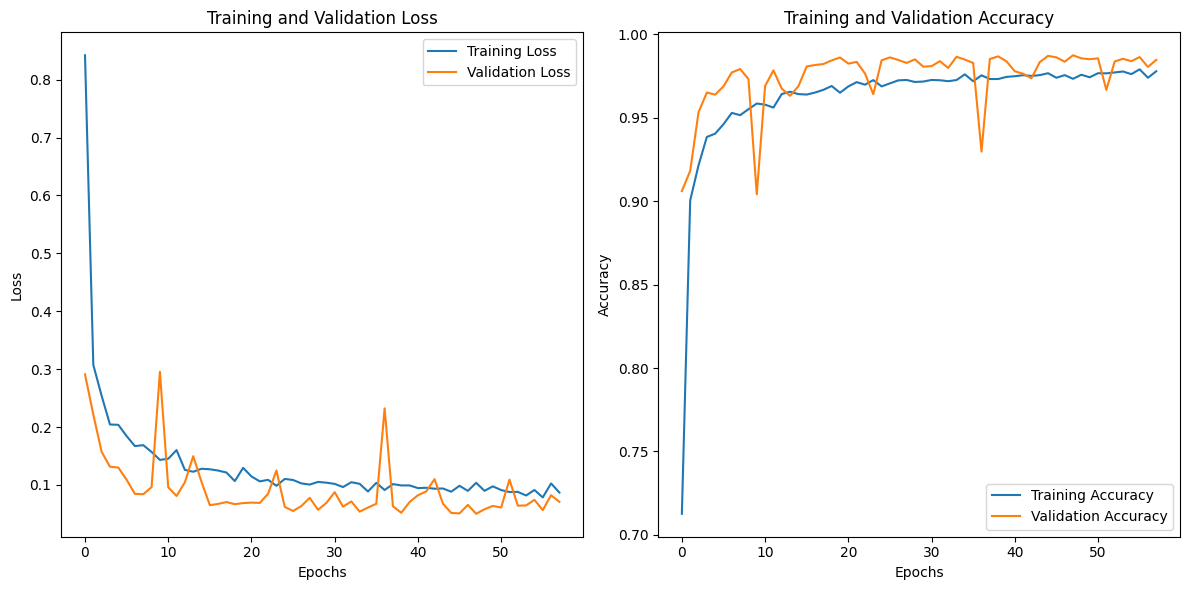

In [49]:
import matplotlib.pyplot as plt

# Plotting loss
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history_data['loss'], label='Training Loss')
plt.plot(history_data['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plotting accuracy
plt.subplot(1, 2, 2)
plt.plot(history_data['accuracy'], label='Training Accuracy')
plt.plot(history_data['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [ ]:
import os
import cv2
import mediapipe as mp

# Tentukan folder output
output_dir = "./tmp/"

# Pastikan folder output ada
os.makedirs(output_dir, exist_ok=True)

# Daftar file gambar
IMAGE_FILES = [
    'asl_alphabet_test/asl_alphabet_test/tanganku1.jpg',
    'asl_alphabet_test/asl_alphabet_test/B_test.jpg',
    'asl_alphabet_test/asl_alphabet_test/F_test.jpg',
    'asl_alphabet_test/asl_alphabet_test/G_test.jpg',
]

# Inisialisasi MediaPipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=1,
    min_detection_confidence=0.5) as hands:

    # Proses setiap gambar
    for idx, file in enumerate(IMAGE_FILES):
        # Membaca gambar, membalikkan di sepanjang sumbu y untuk output keterampilan tangan yang benar
        image = cv2.flip(cv2.imread(file), 1)
        
        # Convert gambar dari BGR ke RGB sebelum diproses oleh MediaPipe
        results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Print handedness dan menggambar landmark tangan di gambar
        print('Handedness:', results.multi_handedness)
        if not results.multi_hand_landmarks:
            continue

        image_height, image_width, _ = image.shape
        annotated_image = image.copy()

        # Untuk setiap landmark tangan yang ditemukan
        for hand_landmarks in results.multi_hand_landmarks:
            print('hand_landmarks:', hand_landmarks)
            print(
                f'Index finger tip coordinates: (',
                f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
                f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
            )
            mp_drawing.draw_landmarks(
                annotated_image,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style()
            )
        
        # Menyimpan gambar yang sudah diberi anotasi ke direktori yang benar
        output_path = os.path.join(output_dir, f'annotated_image_{idx}.png')
        cv2.imwrite(output_path, cv2.flip(annotated_image, 1))
        print(f"Gambar disimpan di {output_path}")

        # Menarik landmark dunia tangan (jika ada)
        if not results.multi_hand_world_landmarks:
            continue
        for hand_world_landmarks in results.multi_hand_world_landmarks:
            mp_drawing.plot_landmarks(
                hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)


In [166]:
print('d')

d


In [ ]:
import os
import cv2
import mediapipe as mp

# Tentukan folder output
output_dir = "./tmp/"

# Pastikan folder output ada
os.makedirs(output_dir, exist_ok=True)

# Daftar file gambar
IMAGE_FILES = [
    'asl_alphabet_test/asl_alphabet_test/A_test.jpg',
    'asl_alphabet_test/asl_alphabet_test/B_test.jpg',
    'asl_alphabet_test/asl_alphabet_test/F_test.jpg',
    'asl_alphabet_test/asl_alphabet_test/G_test.jpg',
]

# Inisialisasi MediaPipe Hands
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles

with mp_hands.Hands(
    static_image_mode=True,
    max_num_hands=1,
    min_detection_confidence=0.5) as hands:

    # Proses setiap gambar
    for idx, file in enumerate(IMAGE_FILES):
        # Membaca gambar, membalikkan di sepanjang sumbu y untuk output keterampilan tangan yang benar
        image = cv2.flip(cv2.imread(file), 1)
        
        # Convert gambar dari BGR ke RGB sebelum diproses oleh MediaPipe
        results = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

        # Print handedness dan menggambar landmark tangan di gambar
        print('Handedness:', results.multi_handedness)
        if not results.multi_hand_landmarks:
            continue

        image_height, image_width, _ = image.shape
        annotated_image = image.copy()

        # Untuk setiap landmark tangan yang ditemukan
        for hand_landmarks in results.multi_hand_landmarks:
            print('hand_landmarks:', hand_landmarks)
            print(
                f'Index finger tip coordinates: (',
                f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].x * image_width}, '
                f'{hand_landmarks.landmark[mp_hands.HandLandmark.INDEX_FINGER_TIP].y * image_height})'
            )
            mp_drawing.draw_landmarks(
                annotated_image,
                hand_landmarks,
                mp_hands.HAND_CONNECTIONS,
                mp_drawing_styles.get_default_hand_landmarks_style(),
                mp_drawing_styles.get_default_hand_connections_style()
            )
        
        # Menyimpan gambar yang sudah diberi anotasi ke direktori yang benar
        output_path = os.path.join(output_dir, f'annotated_image_{idx}.png')
        cv2.imwrite(output_path, cv2.flip(annotated_image, 1))
        print(f"Gambar disimpan di {output_path}")

        # Menarik landmark dunia tangan (jika ada)
        if not results.multi_hand_world_landmarks:
            continue
        for hand_world_landmarks in results.multi_hand_world_landmarks:
            mp_drawing.plot_landmarks(
                hand_world_landmarks, mp_hands.HAND_CONNECTIONS, azimuth=5)

In [16]:
import os
import cv2

# Tentukan direktori utama dan subfolder untuk label
base_dir = './test'
subfolders = [chr(i) for i in range(ord('d'), ord('z') + 1)]  # Membuat list huruf d-z

# Membuat struktur folder jika belum ada
for subfolder in subfolders:
    os.makedirs(os.path.join(base_dir, subfolder), exist_ok=True)

# Inisialisasi VideoCapture untuk mengambil input dari kamera
cap = cv2.VideoCapture(0)

# Menyimpan label saat ini dan gambar yang telah diambil
current_label = None
image_count = 0
max_images_per_label = 10

# Fungsi untuk menampilkan pesan label saat ini
def display_label_on_frame(frame, label):
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, f"Current Label: {label if label else 'None'}", (10, 30), font, 1, (0, 255, 0), 2)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Membalikkan gambar di sepanjang sumbu y agar hasil tangan terlihat benar
    frame = cv2.flip(frame, 1)

    # Menampilkan label di video
    display_label_on_frame(frame, current_label)

    # Menampilkan frame
    cv2.imshow("Camera", frame)

    # Menunggu input dari keyboard
    key = cv2.waitKey(1) & 0xFF

    # Jika tombol d-z ditekan, set label sesuai tombol dan reset hitungan gambar
    if ord('d') <= key <= ord('z'):
        current_label = chr(key)
        image_count = 0  # Reset hitungan gambar
        print(f"Label set to '{current_label}'")

    # Jika tombol 's', simpan gambar ke folder sesuai label dan lanjutkan
    elif key == ord('s'):
        if current_label:
            # Tentukan folder tujuan berdasarkan label
            folder_path = os.path.join(base_dir, current_label)
            # Tentukan nama file berdasarkan hitungan gambar
            image_path = os.path.join(folder_path, f"{image_count + 1}.jpg")
            # Simpan gambar
            cv2.imwrite(image_path, frame)
            print(f"Image saved to {image_path}")
            
            # Update hitungan gambar
            image_count += 1
            
            # Jika sudah mengambil 10 gambar, tunggu tombol 's' untuk lanjut ke label berikutnya
            if image_count >= max_images_per_label:
                print(f"10 images captured for label '{current_label}'. Press 's' to switch to next label.")
                current_label = None  # Reset label setelah 10 gambar diambil
                image_count = 0  # Reset hitungan gambar untuk label berikutnya

        else:
            print("Please set a label first (press a key between 'd' and 'z')")

    # Jika tombol 'q', keluar dari program
    elif key == ord('q'):
        break

# Menutup kamera dan jendela OpenCV
cap.release()
cv2.destroyAllWindows()



Label set to 's'
Label set to 'q'
Label set to 'q'
Label set to 'd'
Label set to 's'
Label set to 'd'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'w'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'
Label set to 'q'


KeyboardInterrupt: 

In [10]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands


alphabets_test = list("defghijklmnopqrstuvwxyz")
temp_dataset = []
print('mulai')
for label in alphabets_test:
    dataset_directory_prefix = 'test'
    for dirname, _, filenames in os.walk(os.path.join(dataset_directory_prefix, label)):

        for filename in filenames:
            pathname = os.path.join(dirname, filename)

            with mp_hands.Hands(
                static_image_mode=True,
                max_num_hands=1,
                min_detection_confidence=0.3
            ) as hands:

                image = cv2.flip(cv2.imread(pathname), 1)
                result = hands.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

                landmark_vertices_xyz = []
                if not result.multi_hand_landmarks:
                    continue

                for l in result.multi_hand_landmarks[0].landmark:
                    landmark_vertices_xyz.append(l.x)
                    landmark_vertices_xyz.append(l.y)
                    landmark_vertices_xyz.append(l.z)

                temp_dataset.append((*landmark_vertices_xyz, label))
                
    print(f'imported: {label}')
        
landmark_vertices_xyz_label = []
for idx in range(21):
    for char in list('xyz'):
        vertex_label = char+str(idx)
        landmark_vertices_xyz_label.append(vertex_label)
            
print(*landmark_vertices_xyz_label)
        
datatest = pd.DataFrame(temp_dataset, columns=[*landmark_vertices_xyz_label, 'target'])
datatest.head()

mulai
imported: d
imported: e
imported: f
imported: g
imported: h
imported: i
imported: j
imported: k
imported: l
imported: m
imported: n
imported: o
imported: p
imported: q
imported: r
imported: s
imported: t
imported: u
imported: v
imported: w
imported: x
imported: y
imported: z
x0 y0 z0 x1 y1 z1 x2 y2 z2 x3 y3 z3 x4 y4 z4 x5 y5 z5 x6 y6 z6 x7 y7 z7 x8 y8 z8 x9 y9 z9 x10 y10 z10 x11 y11 z11 x12 y12 z12 x13 y13 z13 x14 y14 z14 x15 y15 z15 x16 y16 z16 x17 y17 z17 x18 y18 z18 x19 y19 z19 x20 y20 z20


,x0,y0,z0,x1,y1,z1,x2,y2,z2,x3,...,x18,y18,z18,x19,y19,z19,x20,y20,z20,target
0,0.191921,0.639035,2.601632e-07,0.239120,0.633928,-0.002469,0.277063,0.601361,-0.009203,0.314677,...,0.260602,0.450466,-0.041884,0.278752,0.420593,-0.044247,0.285837,0.399977,-0.043353,d
1,0.164691,0.654405,1.649824e-07,0.208512,0.645067,0.006083,0.247073,0.614648,0.005463,0.279599,...,0.235274,0.485453,-0.036513,0.260440,0.486054,-0.039114,0.274096,0.495193,-0.038641,d
2,0.221895,0.615047,1.586537e-07,0.265194,0.606854,0.001900,0.304358,0.576728,-0.002750,0.338239,...,0.289503,0.438178,-0.039287,0.306926,0.409184,-0.039976,0.313426,0.390366,-0.038641,d
3,0.234768,0.660098,9.956894e-08,0.280565,0.650830,0.007732,0.318072,0.621500,0.006441,0.350613,...,0.306930,0.487606,-0.044735,0.328276,0.466502,-0.047133,0.338503,0.454903,-0.046421,d
4,0.240476,0.688164,1.095948e-07,0.287092,0.677172,0.009227,0.324695,0.645982,0.007693,0.357384,...,0.315716,0.518215,-0.049316,0.338740,0.510300,-0.051940,0.348534,0.510591,-0.051276,d


In [11]:
datatest.to_csv('datatest.csv', index=False)


## datatest[25:]

In [22]:
test = datatest.drop(['target'],axis=1).values

In [23]:
test[0].reshape((1,-1))

array([[ 1.91920877e-01,  6.39035106e-01,  2.60163205e-07,
         2.39119768e-01,  6.33928359e-01, -2.46948726e-03,
         2.77062774e-01,  6.01361334e-01, -9.20347404e-03,
         3.14676970e-01,  5.83555102e-01, -1.96888838e-02,
         3.36778998e-01,  5.59489548e-01, -2.96565369e-02,
         2.26441115e-01,  4.86961573e-01,  1.58796005e-03,
         2.51476139e-01,  4.28292304e-01, -5.77909080e-03,
         2.64699817e-01,  3.85892212e-01, -1.15186237e-02,
         2.70642042e-01,  3.51593524e-01, -1.62924528e-02,
         2.16714308e-01,  4.80561316e-01, -8.12980998e-03,
         2.82603592e-01,  4.54269856e-01, -2.91316248e-02,
         3.18084180e-01,  4.90512103e-01, -4.00267877e-02,
         3.32790434e-01,  5.27684033e-01, -4.20365669e-02,
         2.14714423e-01,  4.86332119e-01, -1.86478570e-02,
         2.79280514e-01,  4.59857941e-01, -3.76243182e-02,
         3.15415680e-01,  4.92681712e-01, -4.12453227e-02,
         3.30749750e-01,  5.24274826e-01, -3.81221883e-0

In [24]:
test.shape

(230, 63)

In [27]:
arr = []
from tensorflow.keras.models import load_model
old_model = load_model("new_model_fullLabel.h5")
alphabets_test = list("abcdefghijklmnopqrstuvwxyz")
test = np.asarray(test)
for a in range(230):
    prediksi = np.argmax(old_model.predict(test[a].reshape((1,-1))))
    arr.append(alphabets_test[prediksi])
arr

1/1 [==============================] - 0s 19ms/step


['f',
 'g',
 'g',
 'g',
 'g',
 'g',
 'f',
 'g',
 'f',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'e',
 'm',
 'e',
 'e',
 'e',
 'e',
 'm',
 'e',
 'm',
 'm',
 'z',
 'z',
 'z',
 'z',
 'z',
 'z',
 'z',
 'z',
 'z',
 'z',
 'f',
 'f',
 'f',
 'f',
 'g',
 'g',
 'g',
 'f',
 'f',
 'f',
 'f',
 'p',
 'f',
 'p',
 'p',
 'f',
 'f',
 'p',
 'z',
 'p',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'o',
 'f',
 'f',
 'f',
 'f',
 'f',
 'f',
 'f',
 'f',
 'f',
 'f',
 'k',
 'x',
 'x',
 'x',
 'x',
 'j',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'x',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g',
 'i',
 'i',
 'a',
 'a',
 'a',
 'a',
 'j',
 'j',
 'j',
 'j',
 'z',
 'z',
 'z',
 'z',
 'z',
 'z',
 'z',
 'z',
 'z',
 'z',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'r',
 'p',
 'p',
 'p',
 'g',
 'g',
 'g',
 'g',
 'p',
 'g',
 'g',
 'f',
 'g',
 'g',
 'g',
 'g',
 'g',
 'g'

In [ ]:
label_encoder = LabelEncoder()

print("Label target yang dikenal model:", label_encoder.inverse_transform(model.classes_))

In [7]:

import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# Tentukan direktori utama dan label awal
base_dir = './test'
current_label = 'k'
image_count = 0
max_images_per_label = 10  # Maksimum gambar per label

# Membuat struktur folder untuk huruf d-z jika belum ada


# Inisialisasi VideoCapture untuk mengambil input dari kamera
cap = cv2.VideoCapture(0)

# Fungsi untuk menampilkan pesan label saat ini
def display_label_on_frame(frame, label):
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(frame, f"Current Label: {label if label else 'None'}", (10, 30), font, 1, (0, 255, 0), 2)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Membalikkan gambar di sepanjang sumbu y agar hasil tangan terlihat benar
    frame = cv2.flip(frame, 1)

    # Menampilkan label di video
    display_label_on_frame(frame, current_label)

    # Menampilkan frame
    cv2.imshow("Camera", frame)

    # Menunggu input dari keyboard
    key = cv2.waitKey(1) & 0xFF

    # Jika tombol 's', simpan gambar ke folder sesuai label
    if key == ord('s'):
        # Tentukan folder tujuan berdasarkan label
        folder_path = os.path.join(base_dir, current_label)
        # Tentukan nama file berdasarkan hitungan gambar
        image_path = os.path.join(folder_path, f"{image_count + 1}.jpg")
        # Simpan gambar
        cv2.imwrite(image_path, frame)
        print(f"Image saved to {image_path}")
        
        # Update hitungan gambar
        image_count += 1

        # Jika sudah mengambil jumlah maksimum gambar
        if image_count >= max_images_per_label:
            print(f"Finished capturing for label '{current_label}'. Press 'a' to switch to the next label.")

    # Jika tombol 'a', pindah ke label berikutnya
    elif key == ord('a'):
        if image_count >= max_images_per_label:  # Pastikan gambar cukup sebelum lanjut
            if current_label < 'z':  # Jika belum sampai 'z', lanjut ke label berikutnya
                current_label = chr(ord(current_label) + 1)
                image_count = 0  # Reset hitungan gambar untuk label baru
                print(f"Switched to label '{current_label}'.")
            else:
                print("All labels captured. Press 'q' to quit.")
        else:
            print(f"Complete capturing {max_images_per_label} images for label '{current_label}' first!")

    # Jika tombol 'q', keluar dari program
    elif key == ord('q'):
        break

# Menutup kamera dan jendela OpenCV
cap.release()
cv2.destroyAllWindows()


Image saved to ./test\k\1.jpg
Image saved to ./test\k\2.jpg
Image saved to ./test\k\3.jpg
Image saved to ./test\k\4.jpg
Image saved to ./test\k\5.jpg
Image saved to ./test\k\6.jpg
Image saved to ./test\k\7.jpg
Image saved to ./test\k\8.jpg
Image saved to ./test\k\9.jpg
Image saved to ./test\k\10.jpg
Finished capturing for label 'k'. Press 'a' to switch to the next label.


In [51]:
import cv2
import mediapipe as mp
import numpy as np
from tensorflow.keras.models import load_model


# Initialize mediapipe Hands and Drawing
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
alphabetz = list('abcdefghijklmnopqrstuvwxyz')
# Initialize webcam
alphabetz.extend(['del','space','nothing'])
cap = cv2.VideoCapture(0)


def back(*args):
    pass
# Initialize Mediapipe Hands
hands = mp_hands.Hands(
    static_image_mode=False,  # Use False for real-time detection
    max_num_hands=1,
    min_detection_confidence=0.3
)
font = cv2.FONT_HERSHEY_SIMPLEX 
while cap.isOpened():
    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)
    if not ret:
        break

    # Convert the frame to RGB for processing
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the frame
    result = hands.process(frame_rgb)

    # Initialize list for storing landmark coordinates
    landmark_vertices_xyz = []

    if result.multi_hand_landmarks:
        for hand_landmarks in result.multi_hand_landmarks:
            for l in hand_landmarks.landmark:
                landmark_vertices_xyz.append(l.x)
                landmark_vertices_xyz.append(l.y)
                landmark_vertices_xyz.append(l.z)
            # Draw landmarks on the frame
            mp_drawing.draw_landmarks(frame, hand_landmarks, mp_hands.HAND_CONNECTIONS)

    # Predict only if landmark data is complete
    if len(landmark_vertices_xyz) == 63:  # 21 landmarks × 3 (x, y, z)
        res = np.argmax(model.predict(np.array(landmark_vertices_xyz).reshape((1, -1))))
        cv2.putText(
            frame,
            alphabetz[res],
            (50, 50),
            font,
            1,
            (0,0,0),
            2,
            cv2.LINE_4
        )
    else:
        cv2.putText(
            frame,
            "No Prediction",
            (50, 50),
            font,
            1,
            (0, 0, 255),
            2,
            cv2.LINE_4
        )

    # Show the frame
    cv2.imshow('Hand Tracking', frame)

    # Exit on pressing 'q'
    key = cv2.waitKey(1)
    if key == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 24ms/step
